In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys 
## In order to display it directly on the book 
%matplotlib inline

import seaborn as sns
sns.set()
from sklearn.impute import SimpleImputer



In [4]:
train = pd.read_csv("C:\\Users\\Yanis\\Documents\\all\\training_set_metadata.csv")
test = pd.read_csv("C:\\Users\\Yanis\\Documents\\all\\test_set_metadata.csv")
sub_sample = pd.read_csv("C:\\Users\\Yanis\\Documents\\all\\sample_submission.csv")

In [17]:
#NaN filling values
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
train["distmod"] = imp.fit_transform(np.array(train["distmod"]).reshape(-1,1))

In [22]:
test.distmod.fillna(test["distmod"].mean(), inplace=True)
test.hostgal_specz.fillna(test.hostgal_specz.mean(), inplace=True)

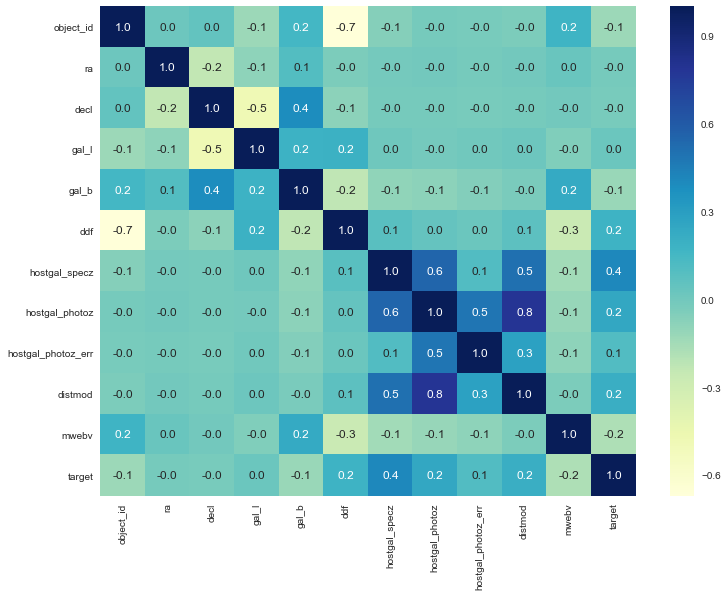

In [36]:
plt.figure(figsize=(12,9))
sns.heatmap(train.corr(), annot=True, fmt=".1f",cmap="YlGnBu")
#High correlation in bright blue

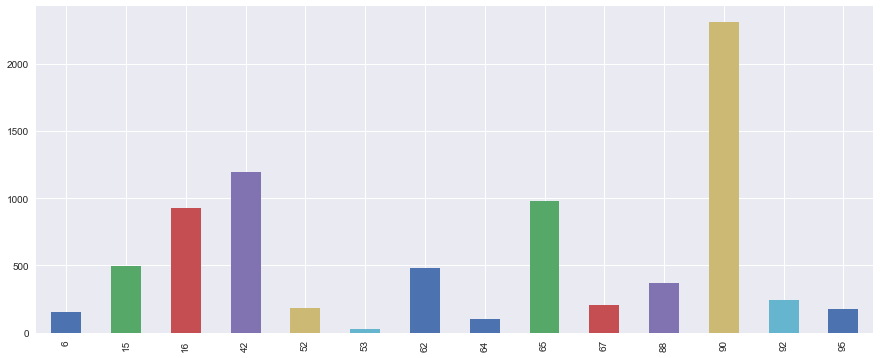

In [43]:
# Class Distribution
plt.figure(figsize=(15,6))
train.target.value_counts().sort_index().plot.bar()

In [52]:
galactic_predicat =  train.hostgal_specz == 0


galactic_objects = train[galactic_predicat]
extragalactic_objects = train[~galactic_predicat]

In [55]:
print(np.unique(galactic_objects["target"]))

[ 6 16 53 65 92]


In [56]:
print(np.unique(extragalactic_objects["target"]))

[15 42 52 62 64 67 88 90 95]


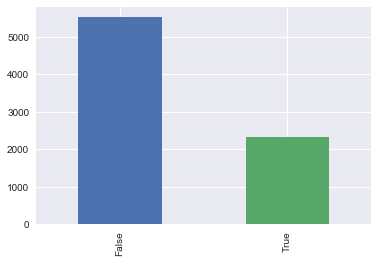

In [61]:
galactic_predicat.value_counts().plot.bar()
#INTRA galactic
#EXTRA galactic